# softmax实现MINIST手写识别

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets
print(tf.__version__)

2.0.0


In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data() #加载数据集
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
train_data_X = np.array(tf.keras.utils.normalize(x_train, axis=1).reshape(60000, 784))
train_data_y = np.array(y_train.reshape(60000, 1))
test_data_X = np.array(tf.keras.utils.normalize(x_test, axis = 1).reshape(10000, 784))
test_data_y = np.array(y_test)

In [5]:
W = np.random.rand(10, 784)
W.shape

(10, 784)

In [6]:
bias = np.random.rand(1, 10)
bias.shape

(1, 10)

In [7]:
def softmax(z):
    if z.ndim == 1:
        return np.exp(z) / np.sum(np.exp(z))
    elif z.ndim == 2:
        exp = np.exp(z)
        sum_exp = np.sum(np.exp(z), axis = 1, keepdims = True)
        return exp / sum_exp

In [8]:
def one_hot(temp):
    one_hot = np.zeros( (len(temp), len(np.unique(temp))) )
    one_hot[np.arange(len(temp)), temp.astype(np.int).T] = 1
    return one_hot

In [9]:
def cross_entropy(y, y_hat):
    loss = -(1 / len(y)) * np.sum(y * np.log(y_hat))
    return loss

In [10]:
def compute_y_hat(W, X, b):
    return np.dot(X, W.T) + bias

In [11]:
train_data_X.shape, train_data_y.shape, W.shape, bias.shape

((60000, 784), (60000, 1), (10, 784), (1, 10))

In [12]:
len(train_data_X)

60000

In [ ]:
All_loss = []

In [16]:
lr = 0.1
All_loss = []
for i in range(1000):
    X = train_data_X
    y_hat = softmax(compute_y_hat(W, X, bias))
    y = one_hot(train_data_y)
    loss = cross_entropy(y, y_hat)
    All_loss.append(loss)
    grad_w = np.dot(X.T, (y_hat - y)) * (1 / len(X))
    grad_b = np.sum(y_hat - y) * (1 / len(X))
    W = W - lr * grad_w.T
    bias = bias - lr * grad_b
    if i % 30 == 0:
        print("i = %d, loss = %f"%(i, loss))

i = 0, loss = 0.529628
i = 30, loss = 0.524755
i = 60, loss = 0.520113
i = 90, loss = 0.515683
i = 120, loss = 0.511452
i = 150, loss = 0.507404
i = 180, loss = 0.503527
i = 210, loss = 0.499809
i = 240, loss = 0.496241
i = 270, loss = 0.492813
i = 300, loss = 0.489516
i = 330, loss = 0.486341
i = 360, loss = 0.483282
i = 390, loss = 0.480332
i = 420, loss = 0.477485
i = 450, loss = 0.474735
i = 480, loss = 0.472076
i = 510, loss = 0.469504
i = 540, loss = 0.467014
i = 570, loss = 0.464602
i = 600, loss = 0.462265
i = 630, loss = 0.459997
i = 660, loss = 0.457796
i = 690, loss = 0.455659
i = 720, loss = 0.453583
i = 750, loss = 0.451565
i = 780, loss = 0.449602
i = 810, loss = 0.447692
i = 840, loss = 0.445832
i = 870, loss = 0.444021
i = 900, loss = 0.442256
i = 930, loss = 0.440535
i = 960, loss = 0.438857
i = 990, loss = 0.437220


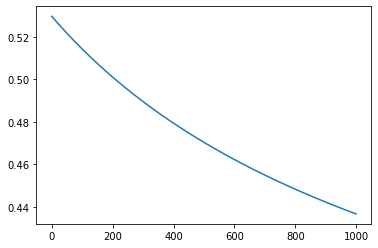

In [17]:
plt.plot(All_loss)

In [18]:
def predict(x):
    y_hat = softmax(compute_y_hat(W, x, bias))
    return np.argmax(y_hat, axis = 1)[:, np.newaxis]

In [21]:
predict(test_data_X).shape, test_data_y.shape

((10000, 1), (10000, 1))

In [20]:
test_data_y = test_data_y.reshape(10000, 1)

In [22]:
np.sum(predict(test_data_X) == test_data_y) / len(test_data_y)

0.8867

In [23]:
print("Correct Rate = {}%".format(np.sum(predict(test_data_X) == test_data_y) / len(test_data_y) * 100))

Correct Rate = 88.67%


In [27]:
from PIL import Image

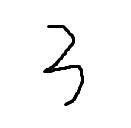
图片 3.png

In [46]:
img = Image.open(r'3.png').convert('L')
# resize的过程
if img.size[0] != 28 or img.size[1] != 28:
    img = img.resize((28, 28))
# 暂存像素值的一维数组
arr = []
for i in range(28):
    for j in range(28):
        # mnist 里的颜色是0代表白色（背景），1.0代表黑色
        pixel = 1.0 - float(img.getpixel((j, i)))/255.0
        # pixel = 255.0 - float(img.getpixel((j, i))) # 如果是0-255的颜色值
        arr.append(pixel)

In [47]:
print(predict(arr))

[[3]]
